# Task 1: Movie Genre Classification
* Create a machine learning model that can predict the genre of a movie based on its plot summary or other textual information. You can use techniques like TF-IDF or word embeddings with classifiers such as Naive Bayes, Logistic Regression, or Support Vector Machines.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#importing libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [2]:
# Importing and Reading Description File
data_frame_description=pd.read_csv('task1_description.txt')
data_frame_description

,Train data:
0,ID ::: TITLE ::: GENRE ::: DESCRIPTION
1,ID ::: TITLE ::: GENRE ::: DESCRIPTION
2,ID ::: TITLE ::: GENRE ::: DESCRIPTION
3,ID ::: TITLE ::: GENRE ::: DESCRIPTION
4,Test data:
5,ID ::: TITLE ::: DESCRIPTION
6,ID ::: TITLE ::: DESCRIPTION
7,ID ::: TITLE ::: DESCRIPTION
8,ID ::: TITLE ::: DESCRIPTION
9,Source:


### Facts understood from the description file :-
* Train data contains - ID ::: TITLE ::: GENRE ::: DESCRIPTION
* Test data contains - ID ::: TITLE ::: DESCRIPTION
* Each section is seperated by seperator " ::: "

In [3]:
#importing Train Data
dataframe_train=pd.read_csv('task1_train_data.txt',sep=':::',names=['ID','TITLE', 'GENRE', 'DESCRIPTION'], engine='python')

In [4]:
# Understanding the dimensions of data
dataframe_train.shape

(54214, 4)

In [5]:
# Understanding the Data Variables
dataframe_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [6]:
# Show the top 5 Rows of data
dataframe_train.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
# Checking for null values
dataframe_train.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [8]:
# Performing Descriptive Analysis
dataframe_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,54214.0,27107.5,15650.378084,1.0,13554.25,27107.5,40660.75,54214.0


### Understanding the GENRE variable

In [9]:
dataframe_train.GENRE.unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [10]:
dataframe_train.GENRE.value_counts()

GENRE
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

<Axes: xlabel='GENRE'>

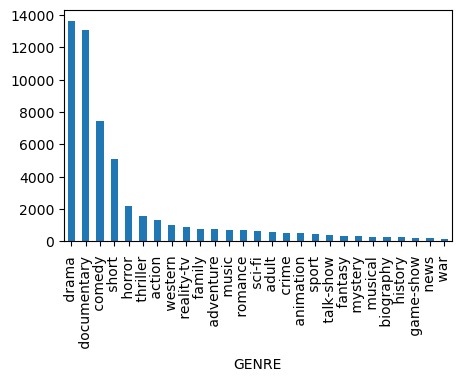

In [11]:
dataframe_train["GENRE"].value_counts().plot(kind="bar",figsize=(5,3))

In [12]:
#importing Test Data
dataframe_test=pd.read_csv('task1_test_data.txt',sep=':::',names=['ID','TITLE','DESCRIPTION'], engine='python')

In [13]:
dataframe_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [14]:
dataframe_test.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [15]:
# To remove stopwords like 'the','and','is' etc from text
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOP_WORDS= set(stopwords.words("english"))  # Stopwords set

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# to return the base or dictionary form of a word
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
# Define function for cleaning data
from nltk.tokenize import word_tokenize
import re # For replacing any text if required

def Pre_process_text(act_string):
    # remove all values other than alphabets
    act_string= re.sub(r'[^a-zA-Z+]'," ", act_string)
    act_string = act_string.lower() # lowercasing text
    Token_words = word_tokenize(act_string) # to tokenize strings into words
    #Remove stop words and to return base form of a word
    new_string = [wordnet.lemmatize(word) for word in Token_words if not word in STOP_WORDS] # removing stopwords
    new_string = ' '.join(new_string)
    return new_string

In [18]:
# Clean data in description column of Train data using function
dataframe_train['DESCRIPTION_cleaned'] = dataframe_train['DESCRIPTION'].apply(Pre_process_text)
dataframe_train.head()

,ID,TITLE,GENRE,DESCRIPTION,DESCRIPTION_cleaned
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parent year old ...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers un recovered body ground zer...


In [19]:
# Clean data in description column of Test data using function
dataframe_test['DESCRIPTION_cleaned_test'] = dataframe_test['DESCRIPTION'].apply(Pre_process_text)
dataframe_test.head()

,ID,TITLE,DESCRIPTION,DESCRIPTION_cleaned_test
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane love life car apartment job especial...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherd north tran...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother year serious cancer...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial art superstar br...


### Apply TF-ID (Term Frequency-Inverse Document Frequency)

In [20]:
# TF-ID(Term Frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer
Tfid = TfidfVectorizer()
X_train_Tfid = Tfid .fit_transform(dataframe_train["DESCRIPTION_cleaned"])
X_Test =Tfid.transform(dataframe_test["DESCRIPTION_cleaned_test"])

### Splitting Data For Training and Testing

In [21]:
#First step in building the model is to identify the Feature(Input) variables and Target (Output) variable
features = X_train_Tfid
target = dataframe_train["GENRE"]

In [22]:
from sklearn.model_selection import train_test_split
# Splitting data for training the model and testing the model
# train size taken as 0.8
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = .8)

## Naive Bayes Classifier

In [23]:
from sklearn.naive_bayes import MultinomialNB
# Learn the Multinomial Naive Bayes Model on train data
my_model_NB= MultinomialNB()

In [24]:
# Fitting the model in train data set ie the Naive Bayes Classifier should learn from the Train Data
my_model_NB=my_model_NB.fit(X_train, y_train)

In [25]:
# Predicting Genre from Feature Test values
y_pred_NB = my_model_NB.predict(X_test)
y_pred_NB

array([' drama ', ' documentary ', ' drama ', ..., ' drama ', ' drama ',
       ' drama '], dtype='<U13')

### Testing the Naive Bayes Classifier

In [26]:
from sklearn.metrics import accuracy_score
# find Accurancy Score = (TP+TN)/(TP+TN+FP+FN)
accuracy_score(y_test, y_pred_NB)

0.44046850502628426

In [27]:
from sklearn.metrics import classification_report
# Classification Report
print(classification_report(y_pred_NB,y_test))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00         0
       adult        0.00      0.00      0.00         0
   adventure        0.00      0.00      0.00         0
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.04      0.63      0.08       107
       crime        0.00      0.00      0.00         0
 documentary        0.90      0.52      0.66      4495
       drama        0.86      0.38      0.52      6239
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.00      0.00      0.00         0
     history        0.00      0.00      0.00         0
      horror        0.00      0.00      0.00         0
       music        0.00      0.00      0.00         0
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

## Logistic Regression Model

In [28]:
# Learn the Logistic Regression Model on train data
from sklearn.linear_model import LogisticRegression
my_model_LR=LogisticRegression()

In [29]:
# Fitting the model in train data set ie the  Logistic Regression Model should learn from the Train Data
my_model_LR=my_model_LR.fit(X_train, y_train)

In [30]:
# Predicting Genre from Feature Test values
y_pred_LR = my_model_LR.predict(X_test)
y_pred_LR

array([' family ', ' documentary ', ' drama ', ..., ' drama ', ' drama ',
       ' drama '], dtype=object)

### Testing the Logistic Regression Model

In [31]:
# find Accurancy Score = (TP+TN)/(TP+TN+FP+FN)
accuracy_score(y_test, y_pred_LR)

0.5894125242091672

In [32]:
# Classification Report
print(classification_report(y_pred_LR,y_test))

               precision    recall  f1-score   support

      action        0.24      0.62      0.35       113
       adult        0.22      0.75      0.34        36
   adventure        0.18      0.70      0.28        37
   animation        0.04      0.50      0.07         6
   biography        0.00      0.00      0.00         0
      comedy        0.58      0.54      0.56      1624
       crime        0.01      0.12      0.02         8
 documentary        0.86      0.67      0.75      3389
       drama        0.81      0.54      0.64      4105
      family        0.06      0.43      0.10        21
     fantasy        0.00      0.00      0.00         1
   game-show        0.44      0.95      0.60        19
     history        0.00      0.00      0.00         0
      horror        0.58      0.66      0.61       385
       music        0.36      0.63      0.46        84
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

## Support Vector Machine Classifier Model

In [33]:
from sklearn.svm import SVC
my_model_SVC= SVC(gamma='auto')

In [34]:
# Fitting the model in train data set ie SVC Model should learn from the on Train Data
my_model_SVC.fit(X_train, y_train)

SVC(gamma='auto')

* _**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**_ 

### Predicting using SVC

In [35]:
y_pred_SVC = my_model_SVC.predict(X_test)
y_pred_SVC

array([' drama ', ' drama ', ' drama ', ..., ' drama ', ' drama ',
       ' drama '], dtype=object)

### Testing the SVC Model

In [36]:
# find Accurancy Score = (TP+TN)/(TP+TN+FP+FN)
accuracy_score(y_test, y_pred_SVC)

0.25149866273171634

In [37]:
# Classification Report
print(classification_report(y_pred_SVC,y_test))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00         0
       adult        0.00      0.00      0.00         0
   adventure        0.00      0.00      0.00         0
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.00      0.00      0.00         0
       crime        0.00      0.00      0.00         0
 documentary        0.00      0.00      0.00         0
       drama        1.00      0.25      0.40     10843
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.00      0.00      0.00         0
     history        0.00      0.00      0.00         0
      horror        0.00      0.00      0.00         0
       music        0.00      0.00      0.00         0
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

### Make Predictions on Actual Test Data
* From above results, it is noted that Logistic Regression Model has better Accuracy Values
* So Logistic Regression Model is applied on Actual Test Data to make 'GENRE' Predictions

In [39]:
Genre_Predicted_Test_data= my_model_LR.predict(X_Test)
dataframe_test['Genre_Predicted'] = Genre_Predicted_Test_data
dataframe_test

,ID,TITLE,DESCRIPTION,DESCRIPTION_cleaned_test,Genre_Predicted
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane love life car apartment job especial...,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherd north tran...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother year serious cancer...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial art superstar br...,drama
...,...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",covering multiple genre tale light dark anthol...,drama
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alice cora munro attempt find father british o...,drama
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movie year making oliver twist artful dodger f...,drama
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysterious rock j mike mallard askew b...,drama
